
원본데이터 - 로그데이터

원본데이터  - 유저 특성 데이터 - 클러스터링 이후에 결과 집단의 특성을 토대로 비즈니스 전략 수립 가능


            - 비즈니스 전략 데이터


1. 유저 분석을 위한 유저 기준으로 정리된 데이터 - 클러스터링
=> 유저특성지표

row의 단위 : 유저 1명
col의 단위 : 해당 유저에 대한 통계량

EDA해서 나온 요소들을 통합하기

	1) R, F, M
	2) 구매횟수대비 쿠폰사용율
  	3) 평균구매주기






2. 마케팅, 비즈니스 전략을 위한 데이터
=> 경향성 지표


	1) ROAS 지표 = 광고비 대비 매출액(수익)
	   단위기간 중 총 광고비용이 높은 특정 기간
      	   특정 기간 중에 거래량이 많은 집단 특정
	   전략 : 1)결과값을 보고 저희 주관이 들어간 요소

	2) 오프라인 비용으로부터 초래되는 비효율 줄이기
                주장 : 오프라인 마케팅이 효과가 미비하다
                         효과가 상대적으로 좋은 온라인이 오프라인에 맞춰서 조정되는 것이 비효율이다
	   
                오프라인비용 : 일주일단위로 조정 - 비탄력적 요소
                온라인비용 : 하루 단위로 조정 - 탄력적 요소

	    온라인, 오프라인 7일 이동평균 상관관계 = 0.74

	   총 마케팅비용과 총매출 간의 관계        = 0.14
                온라인비용이동평균과 총매출간의 관계 = 0.2












목표1. 클러스터링 해보기
그것을 위한 숙제
1. RFM 간소화하기(클러스터링과의 비교군) => 7개 그룹정도?
    5 * 5 * 2 =
    - 참고 및 평가요소(+ 실루엣 점수)
    1) 클러스터링을 통해 나온 그룹을 어떤 그룹으로 정의할지의 참고사항
    2) 우리만의 클러스터링이 가지고 있는 요소(ex. 우리가 한 클러스터링의 vip는 ㅇㅇㅇ가 RFM에 비해 높다, 대신 ㅇㅇㅇ는 관대하다)
    분류된 고객층 중에서 특정층을 공략하기 => 최종목표
2. Monetary별 가중치 해결하기
3. EDA를 통한 유저 특성 컬럼 추가하기


목표2. ROAS에 요소 추가



## 2023-04-09
### 1. rfm의 컬럼 기준으로 EDA
        - 컬럼들의 분포를 기준으로 bins값을 다시 정한다든지 등

### 2. rfm의 카테고리 컬럼의 차원 축소
        - 최다구매카테고리 : 당일에 결정
        - 지역 : 5개
        - 최다구매월 : 분기로 축소
        - 성별 : 2개

### 3. 클러스터링
        - 적절한 클러스터링 기법과 클러스터의 수, 각 센터로이드의 특징

## 클러스터링을 강화하는 방향
### 1. 유저 중심 컬럼

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
df1 = pd.read_csv('/content/Onlinesales_info.csv')
df2 = pd.read_csv('/content/Customer_info.csv')
df3 = pd.read_csv('/content/Discount_info.csv')
df4 = pd.read_csv('/content/Marketing_info.csv')
df5 = pd.read_csv('/content/Tax_info.csv')

In [4]:
df = pd.merge(df1, df2, how='left', on='고객ID')
df = pd.merge(df, df5, how='left', on='제품카테고리')

df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['월'] = df['거래날짜'].dt.month

In [5]:
def month_shift(x):
    dict = {1:'Jan',
            2:'Feb',
            3:'Mar',
            4:'Apr',
            5:'May',
            6:'Jun',
            7:'Jul',
            8:'Aug',
            9:'Sep',
            10:'Oct',
            11:'Nov',
            12:'Dec'}

    return dict[x]

In [6]:
df['월'] = df['월'].apply(month_shift)

In [7]:
df = pd.merge(df, df3, how='left', on=['월', '제품카테고리'])

In [8]:
df4['날짜'] = pd.to_datetime(df4['날짜'])
df = pd.merge(df, df4, how='left', left_on='거래날짜', right_on='날짜')

df = df.drop('날짜', axis=1)

In [9]:
df.to_csv('merge.csv')

In [10]:
user_region = pd.DataFrame(df.groupby('고객ID')['고객지역'].apply(lambda x: x.value_counts().idxmax()))

In [11]:
mode_category = pd.DataFrame(df.groupby('고객ID')['제품카테고리'].apply(lambda x: x.value_counts(ascending=False).index.values))
mode_category['first'] = mode_category['제품카테고리'].apply(lambda x: x[0])
mode_category['Second'] = mode_category['제품카테고리'].apply(lambda x: x[1] if len(x) >= 2 else 'None')
mode_category['Third'] = mode_category['제품카테고리'].apply(lambda x: x[2] if len(x) >= 3 else 'None')



mode_category

,제품카테고리,first,Second,Third
고객ID,,,,
USER_0000,"[Apparel, Office]",Apparel,Office,None
USER_0001,"[Nest-USA, Apparel, Office, Bags, Drinkware, N...",Nest-USA,Apparel,Office
USER_0002,"[Office, Lifestyle, Apparel, Drinkware, Bags, ...",Office,Lifestyle,Apparel
USER_0003,"[Apparel, Nest-USA, Nest-Canada, Headgear]",Apparel,Nest-USA,Nest-Canada
USER_0004,"[Apparel, Office, Nest-USA, Lifestyle, Drinkwa...",Apparel,Office,Nest-USA
...,...,...,...,...
USER_1463,"[Apparel, Notebooks & Journals, More Bags, Dri...",Apparel,Notebooks & Journals,More Bags
USER_1464,"[Apparel, Nest-USA, Office, Notebooks & Journa...",Apparel,Nest-USA,Office
USER_1465,"[Apparel, Office]",Apparel,Office,None


In [12]:
df['쿠폰코드'] = df['쿠폰코드'].fillna(np.nan)
df['할인율'] = df['할인율'].fillna(0)

In [13]:
def true_discount(x):
    if x == 'Used':
        return 1
    else:
        return 0

In [14]:
df['true_discount'] = df['쿠폰상태'].apply(true_discount)

In [15]:

# 카테고리별 주문량 계산
category_order_volume = pd.DataFrame(df.groupby('제품카테고리').size().reset_index(name='주문건수'))

# 카테고리별 총 주문 수량 계산
category_order_quantity = pd.DataFrame(df.groupby('제품카테고리')['수량'].sum().reset_index(name='총주문수량'))


category_order_total = pd.merge(category_order_volume, category_order_quantity,  how='left', on='제품카테고리')
category_order_total['평균주문수량'] = category_order_total['총주문수량'] / category_order_total['주문건수']
category_order_total['주문건수비율(%)'] = (category_order_total['주문건수'] / category_order_total['주문건수'].sum()).round(4) * 100

print('                            제품카테고별 주문 정보')
category_order_total.sort_values('주문건수', ascending=False).reset_index(drop=True)

                            제품카테고별 주문 정보


,제품카테고리,주문건수,총주문수량,평균주문수량,주문건수비율(%)
0,Apparel,18126,32438,1.789584,34.25
1,Nest-USA,14013,21430,1.529294,26.48
2,Office,6513,88383,13.570244,12.31
3,Drinkware,3483,30501,8.757106,6.58
4,Lifestyle,3092,24881,8.046895,5.84
5,Nest,2198,2837,1.290719,4.15
6,Bags,1882,15273,8.115303,3.56
7,Headgear,771,3533,4.582361,1.46
8,Notebooks & Journals,749,9556,12.758344,1.42
9,Waze,554,1144,2.064982,1.05


In [16]:
# plt.hist(category_order_total['평균주문수량'])
# plt.title('카테고리별 평균주문 분포')

In [17]:
coupon_use_rate = df.groupby(['제품카테고리', '쿠폰상태']).size().unstack(fill_value=0)
coupon_use_rate['Clicked_rate'] = coupon_use_rate['Clicked'] / coupon_use_rate.sum(axis=1)
coupon_use_rate['Not Used_rate'] = coupon_use_rate['Not Used'] / coupon_use_rate.sum(axis=1)
coupon_use_rate['Used_rate'] = coupon_use_rate['Used'] / coupon_use_rate.sum(axis=1)

print('                  제품카테고별 쿠폰상태 비율(%)')
coupon_use_rate= coupon_use_rate[['Used_rate', 'Clicked_rate', 'Not Used_rate']].round(4) * 100


coupon_use_rate['marketing_effect'] = coupon_use_rate['Used_rate']  / (coupon_use_rate['Used_rate'] + coupon_use_rate['Clicked_rate'])


coupon_use_rate['marketing_effect'] = coupon_use_rate['marketing_effect'].round(4) * 100

coupon_use_rate.sort_values('marketing_effect', ascending=False)

                  제품카테고별 쿠폰상태 비율(%)


쿠폰상태,Used_rate,Clicked_rate,Not Used_rate,marketing_effect
제품카테고리,,,,
Lifestyle,35.60,49.45,14.94,41.86
More Bags,38.62,54.35,6.45,41.54
Gift Cards,35.08,50.94,13.79,40.78
Office,34.54,50.59,14.86,40.57
Apparel,33.96,50.88,15.15,40.03
Drinkware,33.33,50.30,16.36,39.85
Notebooks & Journals,34.28,51.94,13.74,39.76
Nest-USA,33.62,50.96,15.41,39.75
Waze,33.17,50.72,16.05,39.54


In [18]:
gender_rate = df.groupby(['제품카테고리', '성별']).size().unstack(fill_value=0)
gender_rate = pd.merge(gender_rate, category_order_total[['제품카테고리', '주문건수']], how='left', on='제품카테고리')
gender_rate = gender_rate.sort_values('주문건수', ascending=False)
gender_rate['Male'] = gender_rate['남'] / gender_rate['주문건수']
gender_rate['Female'] = gender_rate['여'] / gender_rate['주문건수']



print('       제품카테고별 성별 비율(%)')
gender_rate = gender_rate[['제품카테고리', 'Male', 'Female']].set_index('제품카테고리').round(4) * 100
gender_rate.sort_values('Female', ascending=False)

       제품카테고별 성별 비율(%)


,Male,Female
제품카테고리,,
Gift Cards,25.16,74.84
More Bags,30.43,69.57
Headgear,34.63,65.37
Bottles,35.07,64.93
Office,35.85,64.15
Bags,37.19,62.81
Apparel,37.36,62.64
Drinkware,37.38,62.62
Nest-Canada,37.85,62.15


In [19]:
df.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '성별', '고객지역', '가입기간', 'GST', '월', '쿠폰코드', '할인율', '오프라인비용', '온라인비용',
       'true_discount'],
      dtype='object')

고객지역 - 서인
월 - 경화
가입기간 - 정식

거래ID	     - F(count)
거래날짜     - 기준(날짜별 금액), 고유거래일(nunique)
제품ID	    -
제품카테고리 - 최다구매카테고리
수량        - 평균수량
평균금액    - 수량, 할인율, GST 배송료 등과 결합하여 총금액
배송료	    - (총금액 계산을 위한 평균 배송료)
쿠폰상태    - 구매횟수대비쿠폰사용율, 총할인금액, clicked 비율
성별	    - 성별은 성별
고객지역	- 지역은 지역
가입기간	- 기간은 기간
GST	       - 총납세액
월	       - 최다구매월, 해당월의 거래수
할인율	    - 총금액 계산시에 사용, 평균 할인율(not used = 0)

4개씩 분담해서 만들어오기

### 1. raw 데이터 join만 해놓은   df                                
                    
- ~~총금액(row단위) ~~                        
- ~~(총금액 계산을 위한 평균 배송료)  ~~      
- ~~납세액(row)~~

### 2. user별로 groupby한 rfm
- ~~F(count)~~
- 고유거래일(nunique)
- ~~최다구매카테고리~~    
- 평균수량
- ~~총금액(유저단위)~~
- ~~구매횟수대비쿠폰사용율~~
- 총할인금액
- clicked 비율
- 성별, 지역, 기간
- ~~총납세액(유저단위)~~
- 최다구매월
- 해당월의 거래수
- 평균 할인율(not used = 0)



1) 준범                                                               
- 총금액(유저단위)                     
- 총금액(row단위)                    
- 납세액(row)                           
- (총금액 계산을 위한 평균 배송료)        
- 총납세액(유저단위)

2) 정식

- 고유거래일(nunique)
- 평균수량

3) 서인
- 총할인금액
- clicked 비율
- 성별, 지역, 기간

4) 경화
- 최다구매월
- 해당월의 거래수
- 평균 할인율(not used = 0)

In [20]:
transfer = pd.DataFrame(df.groupby(['고객ID', '거래ID'])['배송료'].mean() / df.groupby(['고객ID', '거래ID'])['제품카테고리'].count())
transfer = transfer.reset_index()
transfer = transfer.rename(columns={0:'평균배송료'})


In [21]:
df = pd.merge(df, transfer, how='left', on=['고객ID', '거래ID'])

In [22]:
df['납세액'] = df['수량'] * df['평균금액'] * df['GST']

In [23]:
df['총금액'] = (df['평균금액'] * ((100 - (df['true_discount'] * df['할인율'])) / 100) * df['수량']) + df['평균배송료'] + df['납세액']  # 고객이 최종적으로 부담하는 금액


In [24]:
today_date = dt.datetime(2019,12,31)
rfm = pd.DataFrame(df.groupby('고객ID').agg({'거래ID':'nunique',
                          '총금액':'sum',
                          '거래날짜': lambda x: (today_date - x.max()).days,
                          '납세액':'sum'}))

rfm = rfm.rename(columns={'거래ID':'Frequency',
                          '총금액':'Monetary',
                          '거래날짜':'Recency',
                          '납세액':'총납세액'})
rfm = rfm[['Recency', 'Frequency', 'Monetary', '총납세액']]

In [25]:
rfm.head()

,Recency,Frequency,Monetary,총납세액
고객ID,,,,
USER_0000,107,1,101.3912,4.6982
USER_0001,59,31,15407.7190,2067.9070
USER_0002,73,8,1596.0858,203.6008
USER_0003,17,11,1438.5072,148.2642
USER_0004,107,13,1541.9718,151.7598


In [26]:
temp = pd.DataFrame(df.groupby(['고객ID', '거래ID'])['수량'].sum()).reset_index()

mean_purchase_quantity = temp.groupby('고객ID')['수량'].mean().reset_index()
# 'rfm' 테이블에 고객ID를 기준으로 merge
rfm = pd.merge(rfm, mean_purchase_quantity, on='고객ID', how='left')

# 컬럼명 변경
rfm.rename(columns={'수량': '평균구매수량'}, inplace=True)
rfm.head()

,고객ID,Recency,Frequency,Monetary,총납세액,평균구매수량
0,USER_0000,107,1,101.3912,4.6982,3.000000
1,USER_0001,59,31,15407.7190,2067.9070,11.032258
2,USER_0002,73,8,1596.0858,203.6008,26.125000
3,USER_0003,17,11,1438.5072,148.2642,1.909091
4,USER_0004,107,13,1541.9718,151.7598,4.307692


In [27]:
kh_mon = df.groupby(['고객ID', '월'])['거래ID'].nunique().reset_index(name='구매횟수')
kh_mon = kh_mon.loc[kh_mon.groupby('고객ID')['구매횟수'].idxmax()]
kh_mon = kh_mon.rename(columns={'월':'최다구매월'})


df['real_discount'] = df['할인율'] * df['true_discount']
dis_kh = df.groupby('고객ID')['real_discount'].mean().reset_index()
dis_kh['real_discount'] = dis_kh['real_discount'].round(2)
dis_kh = dis_kh.rename(columns={'real_discount':'평균할인율'})

rfm= pd.merge(rfm,kh_mon, how='left',on='고객ID')
rfm= pd.merge(rfm,dis_kh, how='left',on='고객ID')
rfm

,고객ID,Recency,Frequency,Monetary,총납세액,평균구매수량,최다구매월,구매횟수,평균할인율
0,USER_0000,107,1,101.3912,4.6982,3.000000,Sep,1,30.00
1,USER_0001,59,31,15407.7190,2067.9070,11.032258,Nov,18,8.00
2,USER_0002,73,8,1596.0858,203.6008,26.125000,Jun,4,11.74
3,USER_0003,17,11,1438.5072,148.2642,1.909091,Dec,11,10.59
4,USER_0004,107,13,1541.9718,151.7598,4.307692,Sep,13,9.17
...,...,...,...,...,...,...,...,...,...
1463,USER_1463,270,3,678.7202,51.2202,15.333333,Apr,3,4.29
1464,USER_1464,87,19,2631.9586,277.1706,7.421053,Aug,10,9.25
1465,USER_1465,194,2,128.5234,18.0264,5.000000,Apr,1,3.75
1466,USER_1466,69,1,333.8000,29.8000,2.000000,Oct,1,0.00


In [28]:
unique_transaction_date = df.groupby('고객ID')['거래날짜'].nunique()

# 'rfm' 테이블에 고객ID를 기준으로 merge
rfm = pd.merge(rfm, unique_transaction_date, on='고객ID', how='left')

# 컬럼명 변경
rfm.rename(columns={'거래날짜': '고유거래일수'}, inplace=True)
rfm.head()

,고객ID,Recency,Frequency,Monetary,총납세액,평균구매수량,최다구매월,구매횟수,평균할인율,고유거래일수
0,USER_0000,107,1,101.3912,4.6982,3.000000,Sep,1,30.00,1
1,USER_0001,59,31,15407.7190,2067.9070,11.032258,Nov,18,8.00,3
2,USER_0002,73,8,1596.0858,203.6008,26.125000,Jun,4,11.74,2
3,USER_0003,17,11,1438.5072,148.2642,1.909091,Dec,11,10.59,1
4,USER_0004,107,13,1541.9718,151.7598,4.307692,Sep,13,9.17,1


In [29]:
last_date = dt.datetime(2019, 12, 31)

date = df.sort_values(['고객ID', '거래날짜'])[['고객ID', '거래날짜']].drop_duplicates()
date['구매주기'] = date.groupby('고객ID')['거래날짜'].diff().fillna(last_date-date['거래날짜'])

avg_buying = pd.DataFrame(date.groupby('고객ID')['구매주기'].mean()).reset_index()


rfm = pd.merge(rfm, avg_buying, how='left', on='고객ID').rename(columns={'구매주기':'평균구매주기'})

rfm['평균구매주기'] = rfm['평균구매주기'].dt.days

In [30]:
# 클러스터링에 사용할 유저 특성 테이블
rfm = pd.merge(rfm, mode_category, how='left', on='고객ID')

In [31]:
rfm = rfm.rename(columns={'제품카테고리':'최다구매카테고리',
                          '구매횟수':'당월구매횟수',
                          'first':'First_category',
                          'Second':'Second_category',
                          'Third':'Third_category'})
rfm = rfm.drop('최다구매카테고리', axis=1)
rfm

,고객ID,Recency,Frequency,Monetary,총납세액,평균구매수량,최다구매월,당월구매횟수,평균할인율,고유거래일수,평균구매주기,First_category,Second_category,Third_category
0,USER_0000,107,1,101.3912,4.6982,3.000000,Sep,1,30.00,1,107,Apparel,Office,None
1,USER_0001,59,31,15407.7190,2067.9070,11.032258,Nov,18,8.00,3,168,Nest-USA,Apparel,Office
2,USER_0002,73,8,1596.0858,203.6008,26.125000,Jun,4,11.74,2,155,Office,Lifestyle,Apparel
3,USER_0003,17,11,1438.5072,148.2642,1.909091,Dec,11,10.59,1,17,Apparel,Nest-USA,Nest-Canada
4,USER_0004,107,13,1541.9718,151.7598,4.307692,Sep,13,9.17,1,107,Apparel,Office,Nest-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,270,3,678.7202,51.2202,15.333333,Apr,3,4.29,1,270,Apparel,Notebooks & Journals,More Bags
1464,USER_1464,87,19,2631.9586,277.1706,7.421053,Aug,10,9.25,3,99,Apparel,Nest-USA,Office
1465,USER_1465,194,2,128.5234,18.0264,5.000000,Apr,1,3.75,2,173,Apparel,Office,None
1466,USER_1466,69,1,333.8000,29.8000,2.000000,Oct,1,0.00,1,69,Nest-USA,None,None


In [32]:

df_1=pd.DataFrame(data=df,columns=['고객ID','성별','고객지역','가입기간'])
df_1=df_1.drop_duplicates()
df_1=df_1.reset_index(drop=True)
rfm=pd.merge(rfm,df_1,on='고객ID')

df['df총할인금액']=df['수량']*df['평균금액']*df['true_discount']*(0.01*df['할인율'])
for_rfm=df.groupby('고객ID')['df총할인금액'].sum()
for_rfm=pd.DataFrame(for_rfm)
rfm=pd.merge(rfm,for_rfm,on='고객ID')
rfm.head(10)

clicked = pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts() / df.groupby('고객ID')['쿠폰상태'].count())
clicked_core = pd.DataFrame(clicked.loc[([i if i != 0 else 0 for i in df['고객ID'].unique()], 'Clicked'), :].sort_index())
rfm=pd.merge(rfm,clicked_core,on='고객ID', how='left').fillna(0).rename(columns={'df총할인금액':'총할인금액', '쿠폰상태':'Clicked_ratio'})

In [33]:
coupon = pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts() / df.groupby('고객ID')['쿠폰상태'].count())

coupon_core = pd.DataFrame(coupon.loc[([i if i != 0 else 0 for i in df['고객ID'].unique()], 'Used'), :].sort_index())


rfm = pd.merge(rfm, coupon_core, how='left', on='고객ID').fillna(0)
rfm = rfm.rename(columns={'0_x':'Used_ratio'})
rfm = rfm.rename(columns={'0_y':'Clicked_ratio'})

In [34]:
rfm['Used_ratio_per_F'] = rfm['Used_ratio'] / rfm['Frequency']
rfm['Clicked_ratio_per_F'] = rfm['Clicked_ratio'] / rfm['Frequency']

In [35]:
# for col in rfm[['Recency','Frequency','Monetary','총납세액','평균구매수량', '당월구매횟수','평균할인율','고유거래일수','Used_ratio','평균구매주기', '가입기간', '총할인금액', 'Clicked_ratio']].columns:
#     plt.hist(rfm[col])
#     plt.title(col, fontsize=14)
#     plt.show()

In [36]:
# sns.pairplot(rfm[['Recency','Frequency','Monetary','총납세액','평균구매수량', '당월구매횟수','평균할인율','고유거래일수','평균구매주기', '가입기간', '총할인금액', 'Clicked_ratio','Used_ratio', 'Clicked_ratio_per_F','Used_ratio_per_F']])

In [37]:
core = rfm[['Recency','Frequency','Monetary','총납세액','평균구매수량', '당월구매횟수','평균할인율','고유거래일수','평균구매주기', '가입기간', '총할인금액', 'Clicked_ratio','Used_ratio', 'Clicked_ratio_per_F','Used_ratio_per_F']].corr(method='pearson', min_periods=1)

In [38]:
# for i in core.index:
#     display(pd.DataFrame(core.loc[i, :]))

In [39]:
label_r = [4, 3, 2, 1]
label_f = [1, 2, 3, 4]
label_m = [1, 2, 3, 4]

## EDA
## bins를 만들 때
## 각 컬럼의 히스토그램과 boxplot 등을 봤을 때
## 특정 구간에 밀도가 너무 높아서
## 그 구간을 다시 분할하여 bins 를 생성

# recency_score bins=[0, 70, 180, 280, 364]

rfm["recency_score"] = pd.cut(rfm["Recency"], bins=[0, 30, 90, 180, 364], labels=label_r, include_lowest=True)
rfm["frequency_score"] = pd.cut(rfm["Frequency"], bins=[0, 12, 25, 53, 329], labels=label_f, include_lowest=True)
rfm["monetary_score"] = pd.cut(rfm["Monetary"], bins=[0, 760, 1750, 7594, 90000], labels=label_m, include_lowest=True)
rfm["RFM_SCORE"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

In [40]:
seg_map = {
    r'[1-2]1[1-4]': 'Hibernating',          # 1
    r'[1-2]2[1-4]': 'About to Sleep',       # 2
    r'[1-2][3-4][1-4]': 'At Risk',          # 3
    r'3[1-2][1-4]': 'Can\'t Lose',          # 4
    r'3[3-4][1-4]': 'Typical',              # 5
    r'4[1-2][1-2]': 'New Customers',        # 6
    r'4[1-2][3-4]': 'Loyal Customers',      # 7
    r'4[3-4][1-3]': 'Loyal Customers',      # 7
    r'4[3-4][4]': 'VIP'                     # 8
}

rfm['Segmentation'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [41]:
indexing = ['VIP',
            'Loyal Customers',
            'Typical',
            'New Customers',
            'At Risk',
            'Can\'t Lose',
            'About to Sleep',
            'Hibernating'
            ]

In [42]:
seg_stats = pd.DataFrame((rfm['Segmentation'].value_counts()/ rfm['Segmentation'].count()).round(4)*100)

In [43]:
seg_stats.reindex(index=indexing)

,count
Segmentation,
VIP,3.13
Loyal Customers,7.29
Typical,7.56
New Customers,5.65
At Risk,10.22
Can't Lose,13.62
About to Sleep,12.87
Hibernating,39.65


In [44]:
def month_shift(x):
    dict = {1:'Jan',
            2:'Feb',
            3:'Mar',
            4:'Apr',
            5:'May',
            6:'Jun',
            7:'Jul',
            8:'Aug',
            9:'Sep',
            10:'Oct',
            11:'Nov',
            12:'Dec'}

    return dict[x]

In [45]:
# df.groupby(['월', '제품카테고리'])['평균금액'].sum().unstack(fill_value=0).reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar', stacked=True, figsize=[30, 20], fontsize=50)
# plt.title('월별 최대매출 카테고리', fontsize=70)

In [46]:
# df.groupby(['월', '제품카테고리']).size().unstack(fill_value=0).reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar', stacked=True, figsize=[30, 20], fontsize=50)
# plt.title('월별 최다구매 카테고리', fontsize=70)


In [47]:
user_feature_core = pd.DataFrame(rfm.groupby('Segmentation')[['총납세액','평균구매수량' ,'평균할인율' ,'고유거래일수', '평균구매주기', '가입기간', '총할인금액']].mean().reindex(index=indexing))
user_feature_core

,총납세액,평균구매수량,평균할인율,고유거래일수,평균구매주기,가입기간,총할인금액
Segmentation,,,,,,,
VIP,1858.580372,11.968926,7.390435,7.391304,99.086957,25.565217,1221.132500
Loyal Customers,365.628813,7.542917,8.523925,3.028037,85.280374,25.794393,292.576561
Typical,836.782486,7.704747,6.164234,3.720721,100.972973,25.864865,500.181252
New Customers,77.317601,4.547885,9.465301,1.734940,46.325301,27.638554,71.881795
At Risk,846.500443,9.466860,6.613467,2.993333,147.426667,24.980000,465.457153
Can't Lose,207.854217,9.688639,5.224400,1.950000,92.315000,24.960000,114.359050
About to Sleep,347.562559,9.613261,6.735450,1.915344,174.317460,27.253968,198.647296
Hibernating,96.884352,10.867668,6.681856,1.350515,202.960481,25.855670,54.250242


In [48]:
# plt.figure(figsize=(40, 20))
# for i, col in enumerate(user_feature_core.columns):
#     plt.subplot(2, 4, i+1)
#     sns.barplot(data=user_feature_core, x=user_feature_core.index, y=col, color='skyblue')
#     plt.title(col, fontsize=24)
#     plt.xticks(rotation=30, fontsize=12)
#     plt.ylabel("")
#     plt.xlabel("")

# plt.show()

In [49]:
total_delivery = pd.DataFrame(df.groupby('고객ID')['평균배송료'].sum()).rename(columns={'평균배송료':'총배송료'})
avg_delivery = pd.DataFrame(df.groupby('고객ID')['평균배송료'].mean())
avg_tax = pd.DataFrame(df.groupby('고객ID')['납세액'].mean())
total_quantity = pd.DataFrame(df.groupby('고객ID')['수량'].sum())
avg_discount = pd.DataFrame(df.groupby('고객ID')['df총할인금액'].mean())

temp_merge = pd.concat([avg_delivery, avg_tax, total_quantity, avg_discount, total_delivery], axis=1)
temp_merge = temp_merge.rename(columns={'납세액':'평균납세액', '수량':'총구매수량', 'df총할인금액':'평균할인금액'})
temp_merge

,평균배송료,평균납세액,총구매수량,평균할인금액,총배송료
고객ID,,,,,
USER_0000,37.500000,2.349100,3,4.648500,75.00
USER_0001,4.774333,34.465117,342,13.025800,286.46
USER_0002,3.524783,8.852209,209,5.682826,81.07
USER_0003,4.846471,8.721424,21,8.953941,82.39
USER_0004,4.291389,4.215550,56,5.743000,154.49
...,...,...,...,...,...
USER_1463,13.478571,7.317171,46,1.598571,94.35
USER_1464,5.551250,6.929265,141,5.757800,222.05
USER_1465,1.562500,2.253300,10,0.445375,12.50


In [50]:
rfm = pd.merge(rfm, temp_merge, how='left', on='고객ID')
rfm

,고객ID,Recency,Frequency,Monetary,총납세액,평균구매수량,최다구매월,당월구매횟수,평균할인율,고유거래일수,...,recency_score,frequency_score,monetary_score,RFM_SCORE,Segmentation,평균배송료,평균납세액,총구매수량,평균할인금액,총배송료
0,USER_0000,107,1,101.3912,4.6982,3.000000,Sep,1,30.00,1,...,2,1,1,211,Hibernating,37.500000,2.349100,3,4.648500,75.00
1,USER_0001,59,31,15407.7190,2067.9070,11.032258,Nov,18,8.00,3,...,3,3,4,334,Typical,4.774333,34.465117,342,13.025800,286.46
2,USER_0002,73,8,1596.0858,203.6008,26.125000,Jun,4,11.74,2,...,3,1,2,312,Can't Lose,3.524783,8.852209,209,5.682826,81.07
3,USER_0003,17,11,1438.5072,148.2642,1.909091,Dec,11,10.59,1,...,4,1,2,412,New Customers,4.846471,8.721424,21,8.953941,82.39
4,USER_0004,107,13,1541.9718,151.7598,4.307692,Sep,13,9.17,1,...,2,2,2,222,About to Sleep,4.291389,4.215550,56,5.743000,154.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,270,3,678.7202,51.2202,15.333333,Apr,3,4.29,1,...,1,1,1,111,Hibernating,13.478571,7.317171,46,1.598571,94.35
1464,USER_1464,87,19,2631.9586,277.1706,7.421053,Aug,10,9.25,3,...,3,2,3,323,Can't Lose,5.551250,6.929265,141,5.757800,222.05
1465,USER_1465,194,2,128.5234,18.0264,5.000000,Apr,1,3.75,2,...,1,1,1,111,Hibernating,1.562500,2.253300,10,0.445375,12.50
1466,USER_1466,69,1,333.8000,29.8000,2.000000,Oct,1,0.00,1,...,3,1,1,311,Can't Lose,6.000000,29.800000,2,0.000000,6.00


In [51]:
rfm['attempt_ratio'] = rfm['Clicked_ratio'] + rfm['Used_ratio']
rfm['attempt_ratio_per_F'] = rfm['attempt_ratio'] / rfm['Frequency']
rfm

,고객ID,Recency,Frequency,Monetary,총납세액,평균구매수량,최다구매월,당월구매횟수,평균할인율,고유거래일수,...,monetary_score,RFM_SCORE,Segmentation,평균배송료,평균납세액,총구매수량,평균할인금액,총배송료,attempt_ratio,attempt_ratio_per_F
0,USER_0000,107,1,101.3912,4.6982,3.000000,Sep,1,30.00,1,...,1,211,Hibernating,37.500000,2.349100,3,4.648500,75.00,1.000000,1.000000
1,USER_0001,59,31,15407.7190,2067.9070,11.032258,Nov,18,8.00,3,...,4,334,Typical,4.774333,34.465117,342,13.025800,286.46,0.766667,0.024731
2,USER_0002,73,8,1596.0858,203.6008,26.125000,Jun,4,11.74,2,...,2,312,Can't Lose,3.524783,8.852209,209,5.682826,81.07,0.956522,0.119565
3,USER_0003,17,11,1438.5072,148.2642,1.909091,Dec,11,10.59,1,...,2,412,New Customers,4.846471,8.721424,21,8.953941,82.39,0.823529,0.074866
4,USER_0004,107,13,1541.9718,151.7598,4.307692,Sep,13,9.17,1,...,2,222,About to Sleep,4.291389,4.215550,56,5.743000,154.49,0.777778,0.059829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,270,3,678.7202,51.2202,15.333333,Apr,3,4.29,1,...,1,111,Hibernating,13.478571,7.317171,46,1.598571,94.35,0.857143,0.285714
1464,USER_1464,87,19,2631.9586,277.1706,7.421053,Aug,10,9.25,3,...,3,323,Can't Lose,5.551250,6.929265,141,5.757800,222.05,0.925000,0.048684
1465,USER_1465,194,2,128.5234,18.0264,5.000000,Apr,1,3.75,2,...,1,111,Hibernating,1.562500,2.253300,10,0.445375,12.50,0.875000,0.437500
1466,USER_1466,69,1,333.8000,29.8000,2.000000,Oct,1,0.00,1,...,1,311,Can't Lose,6.000000,29.800000,2,0.000000,6.00,0.000000,0.000000


In [52]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary', '총납세액', '평균구매수량', '최다구매월',
       '당월구매횟수', '평균할인율', '고유거래일수', '평균구매주기', 'First_category',
       'Second_category', 'Third_category', '성별', '고객지역', '가입기간', '평균할인금액','총할인금액', '평균배송료','총배송료', '평균납세액',
       '총구매수량',
       'Clicked_ratio', 'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio_per_F', 'attempt_ratio', 'attempt_ratio_per_F']]

In [53]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량',
           '총할인금액','평균할인금액','평균할인율',
           '총배송료','평균배송료',
           '최다구매월','당월구매횟수',
           '고유거래일수', '평균구매주기',
           '성별', '고객지역', '가입기간',
       'First_category','Second_category', 'Third_category',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]

In [54]:
first_purchase_date = df.groupby('고객ID')['거래날짜'].min()
# 추가 구매 데이터만 가져오기
additional_purchase = df[df['거래날짜'] > first_purchase_date[df['고객ID']].values]
# 고객별 추가 구매 횟수 계산
additional_purchase_count = additional_purchase.groupby('고객ID')['거래날짜'].nunique().reset_index(name='추가구매일수')


category_count = df.groupby('고객ID')['제품카테고리'].nunique().reset_index(name='구매카테고리수')
rfm = rfm.merge(additional_purchase_count, on='고객ID', how='left').fillna(0)
rfm = rfm.merge(category_count, on='고객ID', how='left')

In [55]:
purchase_dates = df.groupby('고객ID')['거래날짜'].agg(['min', 'max']).reset_index()
purchase_dates['Length'] = (purchase_dates['max'] - purchase_dates['min']).dt.days

purchase_dates = purchase_dates[['고객ID', 'Length']]
rfm = pd.merge(rfm, purchase_dates, how='left', on='고객ID')

In [56]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량',
           '총할인금액','평균할인금액','평균할인율',
           '총배송료','평균배송료',
           '최다구매월','당월구매횟수',
           '고유거래일수', '평균구매주기','추가구매일수',
           '성별', '고객지역', '가입기간', '구매카테고리수',
       'First_category','Second_category', 'Third_category',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]

In [57]:
pd.options.display.max_columns=None
coupon_count=pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts())

coupon_count = coupon_count.rename(columns={'쿠폰상태':'count'})
coupon_count = coupon_count.reset_index()

used_count=coupon_count.loc[coupon_count['쿠폰상태']=='Used',('고객ID','count')].rename(columns={'count':'used개수'})

notused_count=coupon_count.loc[coupon_count['쿠폰상태']=='Not Used',('고객ID','count')].rename(columns={'count':'not used개수'})
clicked_count=coupon_count.loc[coupon_count['쿠폰상태']=='Clicked',('고객ID','count')].rename(columns={'count':'clicked개수'})

rfm=pd.merge(rfm,used_count,on='고객ID',how='left').fillna(0)
rfm=pd.merge(rfm,notused_count,on='고객ID',how='left').fillna(0)
rfm=pd.merge(rfm,clicked_count,on='고객ID',how='left').fillna(0)
rfm=rfm.astype({'used개수':'int','not used개수':'int','clicked개수':'int'})


In [58]:
rfm = rfm[['고객ID', 'Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량',
           '총할인금액','평균할인금액','평균할인율',
           '총배송료','평균배송료',
           '최다구매월','당월구매횟수',
           '고유거래일수', '평균구매주기','추가구매일수',
           '성별', '고객지역', '가입기간', '구매카테고리수',
       'First_category','Second_category', 'Third_category',
       'used개수',	'not used개수',	'clicked개수',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]


In [59]:
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량',
           '총할인금액','평균할인금액','평균할인율',
           '총배송료','평균배송료',
'당월구매횟수',
           '고유거래일수', '평균구매주기','추가구매일수',
'가입기간', '구매카테고리수',
'used개수',	'not used개수',	'clicked개수',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F']]

In [60]:
rfm_category = rfm.drop(['Recency', 'Frequency', 'Monetary','Length',
           '총납세액', '평균납세액',
           '총구매수량', '평균구매수량',
           '총할인금액','평균할인금액','평균할인율',
           '총배송료','평균배송료',
'당월구매횟수',
           '고유거래일수', '평균구매주기','추가구매일수',
'가입기간', '구매카테고리수',
'used개수',	'not used개수',	'clicked개수',
       'Used_ratio', 'Used_ratio_per_F',
       'Clicked_ratio','Clicked_ratio_per_F',
       'attempt_ratio', 'attempt_ratio_per_F'], axis=1)

In [61]:
# for col in rfm_numeric.columns:
#     plt.hist(rfm_numeric[col])
#     plt.title(col)
#     plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_numeric_s = pd.DataFrame(data=scaler.fit_transform(rfm[['Recency', '평균구매주기',
                                                            '가입기간', '구매카테고리수',
                                                             'Used_ratio', 'Clicked_ratio'
                                                            ]]),
                             columns=['Recency','평균구매주기',
                                      '가입기간', '구매카테고리수',
                                      'Used_ratio',	'Clicked_ratio'
                                      ])

rfm_numeric_log = np.log1p(rfm[['Frequency', 'Monetary', 'Length',
                                '총납세액', '평균납세액','총구매수량',
                                '평균구매수량', '평균할인금액', '당월구매횟수',
                                '평균할인율', '평균배송료', '총할인금액',
                                '고유거래일수', '추가구매일수', '총배송료',
                                'used개수', 'not used개수','clicked개수',
                                'Used_ratio_per_F',	'Clicked_ratio_per_F',
                                'attempt_ratio', 'attempt_ratio_per_F']])


In [63]:
# for col in rfm_numeric_log.columns:
#     plt.hist(rfm_numeric_log[col])
#     plt.title(col)
#     plt.show()

In [64]:
rfm_numeric_done = pd.concat([rfm_numeric_s, rfm_numeric_log], axis=1)
rfm_numeric_done

,Recency,평균구매주기,가입기간,구매카테고리수,Used_ratio,Clicked_ratio,Frequency,Monetary,Length,총납세액,평균납세액,총구매수량,평균구매수량,평균할인금액,당월구매횟수,평균할인율,평균배송료,총할인금액,고유거래일수,추가구매일수,총배송료,used개수,not used개수,clicked개수,Used_ratio_per_F,Clicked_ratio_per_F,attempt_ratio,attempt_ratio_per_F
0,-0.365961,-0.475194,0.364594,-1.271454,-2.997581,3.972191,0.693147,4.628801,0.000000,1.740150,1.208692,1.386294,1.386294,1.731390,0.693147,3.433987,3.650658,2.331853,0.693147,0.000000,4.330733,1.098612,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147
1,-0.837001,0.196981,-0.423659,1.238119,-0.444827,-0.035140,3.465736,9.642689,5.411646,7.634776,3.568550,5.837730,2.487591,2.640898,2.944439,2.197225,1.753423,6.662555,1.386294,1.098612,5.661084,3.044522,2.708050,3.295837,0.013882,0.010695,0.569095,0.024430
2,-0.699614,0.053730,0.937869,-0.016668,-0.180160,0.836019,2.197225,7.375936,4.787492,5.321061,2.287696,5.347108,3.300456,1.899541,1.609438,2.544747,1.509570,4.880565,1.098612,0.693147,4.407573,2.484907,0.693147,2.484907,0.058064,0.058064,0.671168,0.112940
3,-1.249160,-1.466928,-0.065362,-0.644061,-0.225359,0.082723,2.484907,7.272056,0.000000,5.005718,2.274332,3.091042,1.067841,2.297969,2.484907,2.450143,1.765838,5.031855,0.693147,0.000000,4.423528,1.945910,1.386294,2.197225,0.041891,0.031582,0.600774,0.072196
4,-0.365961,-0.475194,0.364594,0.297029,-0.215733,-0.202112,2.639057,7.341466,0.000000,5.028867,1.651645,4.043051,1.669157,1.908505,2.639057,2.319442,1.666081,5.336326,0.693147,0.000000,5.046581,2.484907,2.197225,2.890372,0.035681,0.023232,0.575364,0.058108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,1.233611,1.320945,-1.498549,-0.644061,-0.472879,0.537336,1.386294,6.521681,0.000000,3.955469,2.118322,3.850148,2.793208,0.954962,1.386294,1.665818,2.672670,2.500616,0.693147,0.000000,4.557554,1.386294,0.693147,1.386294,0.133531,0.133531,0.619039,0.251314
1464,-0.562227,-0.563348,1.224506,1.551815,0.095179,0.365593,2.995732,7.875863,4.663439,5.628235,2.070560,4.955827,2.130735,1.910697,2.397895,2.327278,1.879656,5.443767,1.386294,1.098612,5.407396,2.833213,1.386294,3.091042,0.027257,0.020834,0.654926,0.047536
1465,0.487799,0.252077,-0.065362,-1.271454,-0.052095,0.215318,1.098612,4.863862,4.343805,2.945827,1.179670,2.397895,1.791759,0.368369,0.693147,1.558145,0.940983,1.517980,1.098612,0.693147,2.602690,1.386294,0.693147,1.609438,0.223144,0.171850,0.628609,0.362905
1466,-0.738867,-0.893926,1.511144,-1.585151,-2.997581,-2.038806,0.693147,5.813533,0.000000,3.427515,3.427515,1.098612,1.098612,0.000000,0.693147,0.000000,1.945910,0.000000,0.693147,0.000000,1.945910,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
def category_merge(x):
    if x in ['Nest', 'Nest-USA', 'Nest-Canada']:
        return 'Nest'
    elif x in ['Apparel', 'Bags', 'Accessories', 'Headgear', 'More Bags', 'Headgear', 'Backpacks']:
        return 'Apparel'
    elif x in ['Lifestyle', 'Fun', 'Gift Cards']:
        return 'Lifestyle'
    elif x in ['Waze', 'Google', 'Android']:
        return 'IT'
    elif x in ['Housewares', 'Drinkware', 'Bottles']:
        return 'Housewares'
    elif x in ['Office', 'Notebooks & Journals']:
        return 'Stationery'
    else:
        return 'None'

In [66]:
rfm_category['First_category'] = rfm_category['First_category'].apply(category_merge)
rfm_category['Second_category'] = rfm_category['Second_category'].apply(category_merge)
rfm_category['Third_category'] = rfm_category['Third_category'].apply(category_merge)

rfm_category_zip = rfm_category[['First_category',
                                  'Second_category',
                                  'Third_category',
                                  '성별',
                                  '고객지역',
                                  '최다구매월']]

rfm_category_done = pd.get_dummies(rfm_category_zip)

In [67]:
rfm_core = pd.concat([rfm_numeric_done, rfm_category_done], axis=1)

## 클러스터링

### 1. k-means, pca

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## 1. 덴드로그램

In [69]:
# plt.figure(figsize=(15,10))
# plt.title('Dendrogram')
# plt.xlabel('ID')
# plt.ylabel('Euclidean distances')
# dgram = dendrogram(linkage(rfm_core, method = 'ward'))
# plt.show()

## 2. kmeans

In [70]:
# for method in ['random', 'k-means++']:
#     print(method)
#     for k in range(3, 9):
#         kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++').fit(rfm_core)
#         silhouette_avg = silhouette_score(rfm_core, kmeans.labels_)
#         print("k = {} -> silhouette index {}".format(k, silhouette_avg))

#     print()

In [71]:
# pip install yellowbrick

In [72]:
# from yellowbrick.cluster.elbow import kelbow_visualizer

# kelbow_visualizer(KMeans(random_state=42), rfm_core, k=(3,20))


In [73]:
# kelbow_visualizer(KMeans(random_state=42), rfm_core, k=(3,20), metric="silhouette")

In [74]:
# kelbow_visualizer(KMeans(random_state=42), rfm_core, k=(3,20), metric="calinski_harabasz")


In [75]:
len(rfm_numeric_done.columns)

28

## 3. pca + kmeans

정식 = '평균구매수량', '총할인금액', '평균할인금액', '평균할인율',  '총배송료', '평균배송료', '당월구매횟수'

In [76]:
#rfm_core = rfm_core.drop(columns = '평균배송료')

In [77]:
#rfm_core = rfm_core.drop(columns = '평균구매수량')

In [78]:
#rfm_core = rfm_core.drop(columns = '평균할인율')

In [79]:
#rfm_core = rfm_core.drop(columns = '평균할인금액')

In [80]:
#rfm_core = rfm_core.drop(columns = '평균구매주기')

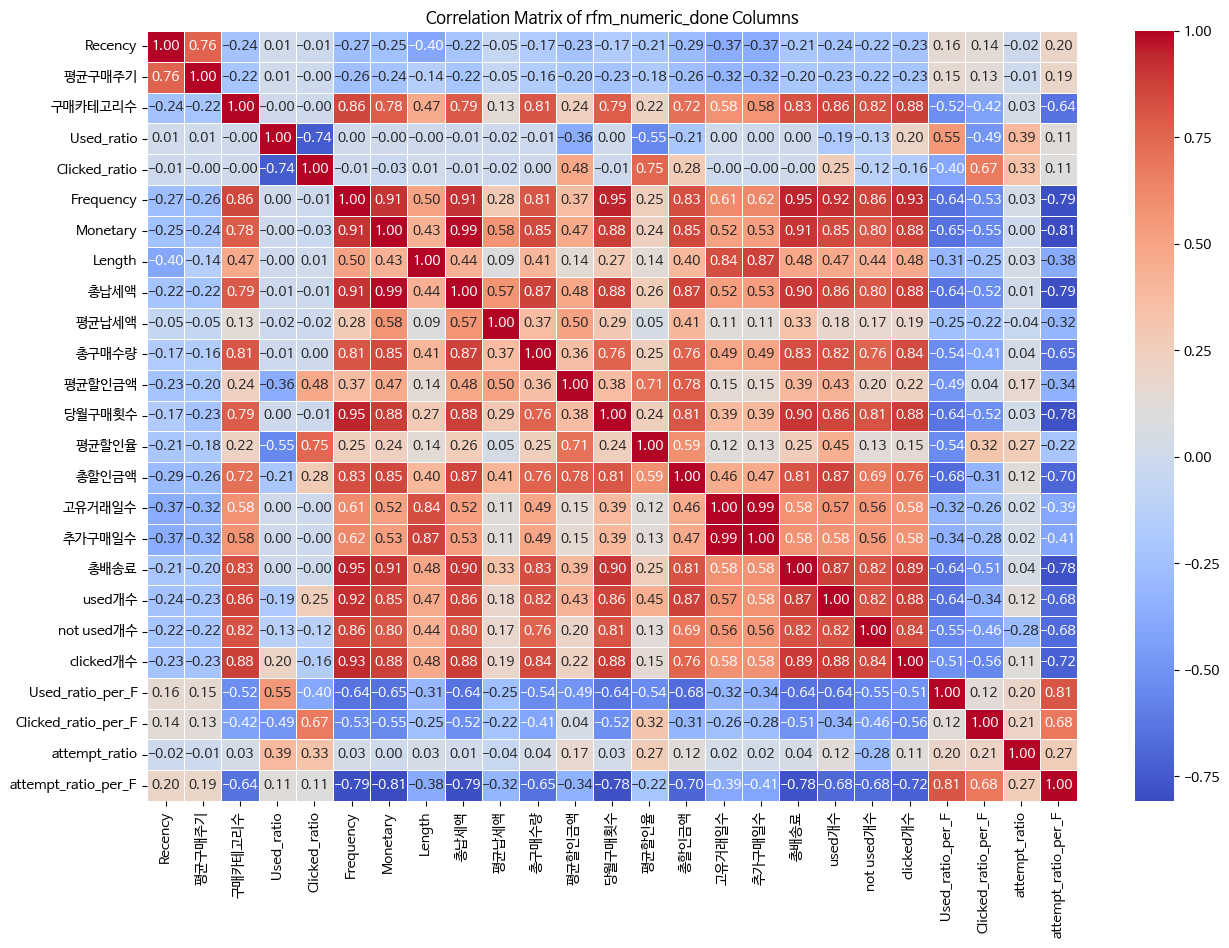

In [104]:
# 상관 행렬 계산
correlation_matrix = rfm_numeric_done.corr()

# 상관 행렬 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of rfm_numeric_done Columns")
plt.show()

In [119]:
pca = PCA(n_components = 2)

rfm_pca = pd.DataFrame(data=pca.fit_transform(rfm_core), columns=['pca1', 'pca2'])

In [106]:
# for k in range(3, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42, init='random').fit(rfm_pca)

#     rfm_core[f'k_{k}_labels'] = kmeans.labels_

In [120]:
silhouette_scores = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init='random').fit(rfm_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_pca, labels))

# 결과 출력
for k, score in zip(range(3, 10), silhouette_scores):
    print(f"k={k}, Silhouette Score: {score}")

k=3, Silhouette Score: 0.4455788672143283
k=4, Silhouette Score: 0.4605679087053208
k=5, Silhouette Score: 0.49386831619559485
k=6, Silhouette Score: 0.4895179570538295
k=7, Silhouette Score: 0.46027932094421875
k=8, Silhouette Score: 0.4457423110088787
k=9, Silhouette Score: 0.4314499027012434


In [108]:
# 평균구매수량
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['평균구매수량'].mean()


k_mean_purchase_by_cluster = pd.DataFrame(cluster_means)
#k_mean_purchase_by_cluster

for column in k_mean_purchase_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_mean_purchase_by_cluster.index:
        plt.scatter(cluster, k_mean_purchase_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_mean_purchase_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()

KeyError: 'k_3_labels'

In [ ]:
# from itertools import combinations

# # 클러스터 레이블 컬럼
# label_column = 'k_5_labels'

# # 클러스터 레이블 추출
# clusters = sorted(rfm_core[label_column].unique())

# # 모든 클러스터 쌍에 대해 t-test 수행
# for i, j in combinations(clusters, 2):
#     group_i = rfm_core[rfm_core[label_column] == i]['평균구매수량']
#     group_j = rfm_core[rfm_core[label_column] == j]['평균구매수량']

#     t_statistic, p_value = ttest_ind(group_i, group_j)

#     print(f"T-test between cluster {i} and {j}:")
#     print("T-statistic:", t_statistic)
#     print("P-value:", p_value)
#     print()

* '총할인금액'

In [ ]:
# 총할인금액
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['총할인금액'].mean()


k_total_discount_price_by_cluster = pd.DataFrame(cluster_means)
k_total_discount_price_by_cluster

for column in k_total_discount_price_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_total_discount_price_by_cluster.index:
        plt.scatter(cluster, k_total_discount_price_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_total_discount_price_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()
# 총할인금액은 k값에 따라 차이가 있지만 클러스터간 평균의 차이가 꽤나 큰 편이긴 한데
# 정말 약간의 차이로 클러스터가 나뉘는 지점이 있어서 전처리를 스탠다드로 해봐도 좋을듯

* '평균할인금액'

In [ ]:
# 평균할인금액
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['평균할인금액'].mean()


k_mean_discount_price_by_cluster = pd.DataFrame(cluster_means)
k_mean_discount_price_by_cluster

for column in k_mean_discount_price_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_mean_discount_price_by_cluster.index:
        plt.scatter(cluster, k_mean_discount_price_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_mean_discount_price_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()
# 평균할인금액은 평균을 낸거라 거기서 거기인듯 0번 세그먼트는 전체적으로 낮은 양상이긴 하지만
# 그 외 세그먼트는 집단간 큰 차이 없음
# 전처리를 다르게 하면 수치가 조금 바뀌겠지만 차원 축소를 위해서라도 차라리 총할인금액을 쓰고 평균할인금액은 드랍해도 좋을 것 같음

*  '평균할인율'

In [ ]:
# 평균할인율
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['평균할인율'].mean()


k_mean_discount_ratio_by_cluster = pd.DataFrame(cluster_means)
k_mean_discount_ratio_by_cluster

for column in k_mean_discount_ratio_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_mean_discount_ratio_by_cluster.index:
        plt.scatter(cluster, k_mean_discount_ratio_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_mean_discount_ratio_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()
# 평균할인율은 거의 1.8~2 사이로 집단간 차이 없음

* '총배송료'

In [ ]:
# 총배송료
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['총배송료'].mean()


k_total_delivery_price_by_cluster = pd.DataFrame(cluster_means)
k_total_delivery_price_by_cluster

for column in k_total_delivery_price_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_total_delivery_price_by_cluster.index:
        plt.scatter(cluster, k_total_delivery_price_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_total_delivery_price_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()

# 집단간 차이는 있지만 거의 차이가 나지 않는 부분이 존재함
# 배송료를 많이 냈다는 것은 구매를 여러번 했다는 것을 의미하기 때문에 클러스터별 차이가 있는듯
# 일반적으로 돈을 많이 쓸 수록 무료배송 혜택을 받을 확률도 높겠지만 이 데이터에 무료배송 쿠폰은 없는듯
# 이것도 전처리 다르게 해보고 다른 컬럼과 같이 활용한다면 유의미 하지 않을까 생각됨

* '평균배송료'

In [ ]:
# 평균배송료
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['평균배송료'].mean()


k_mean_delivery_price_by_cluster = pd.DataFrame(cluster_means)
k_mean_delivery_price_by_cluster


for column in k_mean_delivery_price_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_mean_delivery_price_by_cluster.index:
        plt.scatter(cluster, k_mean_delivery_price_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_mean_delivery_price_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()
# 이것도 전체적으로 1.6 ~ 1.8 수준이라 집단간 차이 없음

* '당월구매횟수'

In [ ]:
# 당월구매횟수
label_columns = ['k_3_labels', 'k_4_labels', 'k_5_labels', 'k_6_labels', 'k_7_labels', 'k_8_labels', 'k_9_labels']

cluster_means = {}
for column in label_columns:
    cluster_means[column] = rfm_core.groupby(column)['당월구매횟수'].mean()


k_count_purchases_month_by_cluster = pd.DataFrame(cluster_means)
k_count_purchases_month_by_cluster


for column in k_count_purchases_month_by_cluster.columns:
    plt.figure(figsize=(10, 6))

    # 각 클러스터에 대한 스캐터 플롯 그리기
    for cluster in k_count_purchases_month_by_cluster.index:
        plt.scatter(cluster, k_count_purchases_month_by_cluster.loc[cluster, column], label=f'Cluster {cluster}')

    plt.title(f"Scatter plot {column}")
    plt.xlabel("Cluster")
    plt.ylabel("k_count_purchases_month_by_cluster")
    plt.legend()
    plt.grid(True)
    plt.show()
# 당월구매횟수는 2번이냐 3번이냐는 다르기 때문에 집단간 차이가 있다고 봐도 될듯
# 일반적으로 생각해도 구매횟수로 등급을 나누는 것은 합리적으로 생각됨

In [ ]:
# for k in range(3, 9):
#     kmeans = KMeans(n_clusters=k, random_state=9, init='k-means++').fit(rfm_pca2)
#     silhouette_avg = silhouette_score(rfm_pca2, kmeans.labels_)
#     print("k = {} -> silhouette index {}".format(k, silhouette_avg))

In [ ]:
# kelbow_visualizer(KMeans(random_state=9), rfm_pca2, k=(3,20))

In [ ]:
# kelbow_visualizer(KMeans(random_state=9), rfm_pca2, k=(3,20), metric='silhouette')

In [ ]:
# kelbow_visualizer(KMeans(random_state=9), rfm_pca2, k=(3,20), metric="calinski_harabasz")

In [ ]:
# for k in range(3, 9):
#     kmeans = KMeans(n_clusters=k, random_state=9, init='random').fit(rfm_pca2)
#     silhouette_avg = silhouette_score(rfm_pca2, kmeans.labels_)
#     print("k = {} -> silhouette index {}".format(k, silhouette_avg))

In [ ]:
# kelbow_visualizer(KMeans(random_state=42, init='random'), rfm_core, k=(3,20))

In [ ]:
# kelbow_visualizer(KMeans(random_state=9, init='random'), rfm_pca2, k=(3,20), metric="silhouette")

In [ ]:
# kelbow_visualizer(KMeans(random_state=9, init='random'), rfm_pca2, k=(3,20), metric="calinski_harabasz")

In [ ]:
# from sklearn.cluster import DBSCAN

In [ ]:
# dbscan = DBSCAN(eps=0.1, min_samples=2).fit(rfm_core.iloc[:, :3])


# rfm_core['dbscan_labels'] = dbscan.labels_
# #

# sns.scatterplot(data = rfm_core, x='Recency', y='Monetary', hue='dbscan_labels')
# plt.title('DBSCAN', fontsize=20)
# plt.xlabel('Recency', fontsize=16)
# plt.ylabel('Monetary', fontsize=16)

In [ ]:
# for k in range(3, 9):
#     h_cluster = rfm_clustering = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward').fit_predict(rfm_core)
#     silhouette_avg = silhouette_score(rfm_core, h_cluster)
#     print("k = {} -> silhouette index {}".format(k, silhouette_avg))

In [ ]:
# kelbow_visualizer(AgglomerativeClustering(metric = 'euclidean', linkage = 'ward'), rfm_core, k=(3,20), metric='silhouette')

- 계층적 군집화 (전체적으로 k=4 일 때 잘 묶어주는듯..)

In [ ]:
# 카피뜨기
rfm_core_copy = rfm_core.copy()


pca = PCA(n_components=2)
rfm_pca = pd.DataFrame(data=pca.fit_transform(rfm_core_copy), columns=['pca1', 'pca2'])


# 계층적 군집화
for k in range(3, 10):
    h_clustering = AgglomerativeClustering(n_clusters=k).fit(rfm_pca)

    rfm_core_copy[f'h_k_{k}_labels'] = h_clustering.labels_

In [ ]:
silhouette_scores = []
for k in range(3, 10):
    h_clustering = AgglomerativeClustering(n_clusters=k).fit(rfm_pca)
    labels = h_clustering.labels_
    silhouette_scores.append(silhouette_score(rfm_pca, labels))

# 결과 출력
for k, score in zip(range(3, 10), silhouette_scores):
    print(f"hierarchical k={k}, Silhouette Score: {score}")

In [ ]:
rfm_core_copy.head(3)

 * '평균구매수량'



In [ ]:
# 평균구매수량
label_columns = ['h_k_3_labels',	'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['평균구매수량'].mean()


h_mean_purchase_by_cluster = pd.DataFrame(h_cluster_means)
h_mean_purchase_by_cluster

# k값에 관계없이 전체 클러스터 평균 구매수량이 1~2개 내외로 비슷하여 평균구매수량으로는 고객의 세그먼트를 나누기 힘들듯

* '총할인금액'

In [ ]:
# 총할인금액
label_columns = ['h_k_3_labels', 'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['총할인금액'].mean()


h_total_discount_price_by_cluster = pd.DataFrame(h_cluster_means)
h_total_discount_price_by_cluster

# k값에 따라 다르지만 집단간 차이는 있는듯
# 세그별로 별 차이가 없는 부분이 존재해서 전처리를 다르게 해서 하면 어떨까 싶음

* '평균할인금액'

In [ ]:
# 평균할인금액
label_columns = ['h_k_3_labels',	'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['평균할인금액'].mean()


h_mean_discount_price_by_cluster = pd.DataFrame(h_cluster_means)
h_mean_discount_price_by_cluster

# k= 4인 부분을 보면 집단간 차이는 있는듯 하지만 k값이 커지면 비슷비슷함
# 총할인금액 컬럼을 쓰는 게 더 좋아보이는듯

*  '평균할인율'

In [ ]:
# 평균할인율
label_columns = ['h_k_3_labels',	'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['평균할인율'].mean()


h_mean_discount_ratio_by_cluster = pd.DataFrame(h_cluster_means)
h_mean_discount_ratio_by_cluster

# 평균할인율은 집단간 차이가 그지 않은 부분이 많은 것으로 보임

* '총배송료'

In [ ]:
# 총배송료
label_columns = ['h_k_3_labels',	'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['총배송료'].mean()


h_total_delivery_price_by_cluster = pd.DataFrame(h_cluster_means)
h_total_delivery_price_by_cluster

# 집단간 차이는 있는 것으로 보여서 전처리 다르게 해보면 좋을듯

* '평균배송료'

In [ ]:
# 평균배송료
label_columns = ['h_k_3_labels',	'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['평균배송료'].mean()


h_mean_delivery_price_by_cluster = pd.DataFrame(h_cluster_means)
h_mean_delivery_price_by_cluster

# 평균은 1.6 ~ 1.8 사이로 비슷함 평균 컬럼은 드랍 하는 게 좋을듯

* '당월구매횟수'

In [ ]:
# 당월구매횟수
label_columns = ['h_k_3_labels',	'h_k_4_labels',	'h_k_5_labels',	'h_k_6_labels',	'h_k_7_labels',	'h_k_8_labels',	'h_k_9_labels']

h_cluster_means = {}
for column in label_columns:
    h_cluster_means[column] = rfm_core_copy.groupby(column)['당월구매횟수'].mean()


h_count_purchases_month_by_cluster = pd.DataFrame(h_cluster_means)
h_count_purchases_month_by_cluster

# k-means와 값은 유사한듯 2회 구매했냐 3회 구매했냐는 다르기 때문에 집단간 차이가 있다고 봐도 될듯함
# 전처리 다르게 해서 해보면 좋을듯

In [ ]:
# h_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage = 'ward').fit(rfm_core.iloc[:, :3])

# rfm_core['h_cluster_label'] = h_cluster.labels_

# sns.scatterplot(data = rfm_core, x='Recency', y='Monetary', hue='h_cluster_label')
# plt.title('계층적 군집화', fontsize=20)
# plt.xlabel('Recency', fontsize=16)
# plt.ylabel('Monetary', fontsize=16)

In [ ]:

# rfm_pca2['kmeans_labels'] = rfm_core['kmeans_labels']
# rfm_pca2['dbscan_labels'] = rfm_core['dbscan_labels']
# rfm_pca2['h_cluster_label'] = rfm_core['h_cluster_label']

In [ ]:
# sns.scatterplot(data = rfm_pca2, x='pca1', y='pca2', hue='kmeans_labels')
# plt.title('kmeans 군집화', fontsize=20)
# plt.xlabel('pca1', fontsize=16)
# # plt.ylabel('pca2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_pca2, x='pca1', y='pca2', hue='dbscan_labels')
# plt.title('dbscan 군집화', fontsize=20)
# plt.xlabel('pca1', fontsize=16)
# plt.ylabel('pca2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_pca2, x='pca1', y='pca2', hue='h_cluster_label')
# plt.title('계층적 군집화', fontsize=20)
# plt.xlabel('pca1', fontsize=16)
# plt.ylabel('pca2', fontsize=16)

In [ ]:
# tsne = TSNE(n_components=2)

# rfm_tsne = pd.DataFrame(data=tsne.fit_transform(rfm_core.iloc[:, :3]), columns=['col1', 'col2'])

# rfm_tsne['kmeans_labels'] = rfm_core['kmeans_labels']
# rfm_tsne['dbscan_labels'] = rfm_core['dbscan_labels']
# rfm_tsne['h_cluster_label'] = rfm_core['h_cluster_label']

In [ ]:
# sns.scatterplot(data = rfm_tsne, x='col1', y='col2', hue='kmeans_labels')
# plt.title('kmeans 군집화', fontsize=20)
# plt.xlabel('col1', fontsize=16)
# plt.ylabel('col2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_tsne, x='col1', y='col2', hue='dbscan_labels')
# plt.title('dbscan 군집화', fontsize=20)
# plt.xlabel('col1', fontsize=16)
# plt.ylabel('col2', fontsize=16)

In [ ]:
# sns.scatterplot(data = rfm_tsne, x='col1', y='col2', hue='h_cluster_label')
# plt.title('계층적 군집화', fontsize=20)
# plt.xlabel('col1', fontsize=16)
# plt.ylabel('col2', fontsize=16)

1. EDA(원본 데이터)
2. 유저데이터 변환 - RFM 분석의 지표를 차용함
4. 클러스터 수 선정 kmeans(init=random)metric=3가지로 했을 때 k=4가 나와서
3. 클러스터링 기법 선정
    - kmeans
    - dbscan: 데이터가 기하학적인 분포가 존재한다고 할 수 없고
      데이터가 밀도가 과도하게 높은 지점이 존재하기 때문에 지나친 양분화로 인해 탈락

    - 계층적 군집화 : 지표로 사용한 RFM 분석에서 cut을 사용하는 것과 유사하게
      트리구조의 개념으로 분류하는 것이라서 적합해보임


### EDA

In [ ]:
##### 비즈니스 인사이트 테이블

In [ ]:
#### ROAS 지표

df.head()

In [ ]:
df['총마케팅비용'] = df['오프라인비용'] + df['온라인비용']
df['ma_total_marketing'] = df['총마케팅비용'].rolling(7).mean().fillna(method='bfill')
df

In [ ]:
marketing = df[['거래날짜', '총마케팅비용']].drop_duplicates().reset_index(drop=True)

marketing2 = df[['거래날짜', '총마케팅비용']].drop_duplicates().reset_index(drop=True)
marketing2['ma_total_marketing'] = marketing2['총마케팅비용'].rolling(7).mean().fillna(method='bfill')
marketing2 = marketing2.rename(columns={'ma_total_marketing':'총마케팅비용(7일ma)'})
marketing2

In [ ]:
sales = df.groupby('거래날짜')['총금액'].sum().reset_index()
sales

In [ ]:
roas1 = pd.merge(marketing, sales, how='left', on='거래날짜')
roas1['ratio'] = roas1['총금액'] / roas1['총마케팅비용']
roas1.sort_values('ratio', ascending=False).head(10)

In [ ]:
roas2 = pd.merge(marketing2, sales, how='left', on='거래날짜')
roas2['ratio'] = roas2['총금액'] / roas2['총마케팅비용(7일ma)']
roas2.sort_values('ratio', ascending=False).head(10)


In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=roas1, x='거래날짜', y='ratio', color='red')
sns.lineplot(data=roas2, x='거래날짜', y='ratio', color='blue')


# ratio(빨강) = 총비용 / 총마케팅비용
# ratio(파랑) = 총비용 / 총마케팅비용(이동평균)

# 총마케팅비용(이동평균) - 원본의 고점을 낮게 만드는 효과

# 마케팅의 특성상 직관적으로 볼때는 이동평균을 하는게 맞아보이는데


In [ ]:
week = []
cut = 0


for i in range(1, 54):
    for j in range(7):
        week.append(i)
        if len(week) == len(roas1):
            break
    if len(week) == len(roas1):
        break

roas1['week'] = np.array(week).reshape(len(roas1), -1)
roas1

In [ ]:
week_core = pd.DataFrame(roas1.groupby('week')[['총마케팅비용', '총금액']].sum()).reset_index()
week_core['ratio_week'] = week_core['총금액'] / week_core['총마케팅비용']
week_core.sort_values('ratio_week', ascending=False).head(10)

In [ ]:
plt.figure(figsize=(20, 3))
sns.lineplot(data=week_core, x='week', y='총마케팅비용', color='red')
sns.lineplot(data=week_core, x='week', y='총금액', color='blue')


In [ ]:
plt.figure(figsize=(20, 3))
sns.lineplot(data=week_core, x='week', y='ratio_week', color='black')